In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression

## Full - Binary Classification

In [2]:
df = pd.read_csv('./Data/BINARY-DF.csv', index_col='PetID') # Classifications for generic DF with isPetAdopted as the target
smote = SMOTE(sampling_strategy=0.8, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
X, y = df.drop(columns='isPetAdopted'), df['isPetAdopted']


foldScores = {}

### Decision Tree

In [12]:
dtree = tree.DecisionTreeClassifier(random_state=42)

dtree_param_grid = {
    'max_depth': [3,5,10,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Decision Tree # {fold + 1}.")
    grid_search = GridSearchCV(estimator=dtree, param_grid=dtree_param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_dtree = grid_search.best_estimator_
    y_pred_val = best_dtree.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['DTree'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))
print(foldScores['DTree'])

Starting Decision Tree # 1.
Starting Decision Tree # 2.
Starting Decision Tree # 3.
Starting Decision Tree # 4.
Starting Decision Tree # 5.
              precision    recall  f1-score   support

       False       0.46      0.58      0.51       739
        True       0.83      0.75      0.79      2004

    accuracy                           0.70      2743
   macro avg       0.65      0.67      0.65      2743
weighted avg       0.73      0.70      0.71      2743

[[ 430  309]
 [ 501 1503]]
{'F1-deviation': 0.012873252777105163, 'F1-average': 0.6964331099904786, 'Accuracy-average': 0.6885406425473164}


- Decision Tree Results

We were able to train a relatively usefull model. The truth is the task we are aiming to predict includes a set of factors that could even be accounted as "luck" given how hard they are to describe as data. It is extremely hard to accurately predict weather a pet is to be adopted in the first 100 days after being listed. 

Even with this adversity, and using Decision Trees, we were able to get 70% of the predictions correct. This however doesn't mean the model had a good performance as the data wasn't exactly balanced. With this to account for, we got a f1-score of 79% in our majority class, but we observed a drop to 51% when it came to the not-adopted pets.

Looking at the confusion matrix, we can check that the ammount of false-negatives (501) is even higher than the ammount of false-positivies (309).
This can come as a surprise seeing that there are more mistakes made for the class with the higher score. This is happening because of sample size as the test contains 739 Falses and 2004 Trues.

With a f1 standard deviation of 0.01 we can assume the model fits about the same way across the entire data.

### Random Forest

In [11]:
rforest = RandomForestClassifier(random_state=42)

param_grid = {
    'max_depth': [3,5,10,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Decision Tree # {fold + 1}.")
    grid_search = GridSearchCV(estimator=rforest, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_rforest = grid_search.best_estimator_
    y_pred_val = best_rforest.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['RForest'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))
print(foldScores['RForest'])

Starting Decision Tree # 1.
Starting Decision Tree # 2.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Starting Decision Tree # 3.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Starting Decision Tree # 4.
Starting Decision Tree # 5.
              precision    recall  f1-score   support

       False       0.52      0.50      0.51       739
        True       0.82      0.83      0.82      2004

    accuracy                           0.74      2743
   macro avg       0.67      0.66      0.67      2743
weighted avg       0.74      0.74      0.74      2743

[[ 369  370]
 [ 344 1660]]
{'F1-deviation': 0.009464845309737862, 'F1-average': 0.7328138915184084, 'Accuracy-average': 0.7354920130647957}


- Random Forest Results

Being essentialy an ensemble of multiple decision trees, it was expected for Random Forest to have sligthly better yet comparable results with the Decision Tree model.

This supposition came true as it was indeed able to get slightly better accuracy (74% vs 71%) as well as a better overall score for the majority class, especially on the recall score for the True class. This however doesn't really translate to that big of an improvement on the model quality as we are still with the exact same score in the minority class and the nature of the problem doesn't require a strict treshold for recall as we are not trying to minimize splicitly false-positives or false-negatives but miss-classifications as a whole.

One case it would be relevant to verify and maximise the recall for a particular class would be for a medical diagnosis or an alarm trigger, where a false-positive is preferabel to a false-negative. 

Overall given the improvement and the increased computational complexity we would say it would be preferable to stay with the Decision Tree over the Random Forest, however is computation isn't an issue, Random Forest is still something to consider.

With a f1 standard deviation of 0.009 we can assume the model fits about the same way across the entire data.

### Bayes

In [10]:
bayes = GaussianNB()
param_grid = {}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Bayes # {fold + 1}.")
    grid_search = GridSearchCV(estimator=bayes, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_bayes = grid_search.best_estimator_
    y_pred_val = best_bayes.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['Bayes'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))
print(foldScores['Bayes'])

Starting Bayes # 1.
Starting Bayes # 2.
Starting Bayes # 3.
Starting Bayes # 4.
Starting Bayes # 5.
              precision    recall  f1-score   support

       False       0.34      0.60      0.44       739
        True       0.80      0.57      0.66      2004

    accuracy                           0.58      2743
   macro avg       0.57      0.59      0.55      2743
weighted avg       0.67      0.58      0.60      2743

[[ 447  292]
 [ 862 1142]]
{'F1-deviation': 0.02164475846044547, 'F1-average': 0.5723353990171749, 'Accuracy-average': 0.5489202305577197}


- Naive Bayes Results

Having a completely different classification method, it was expected for the results to be different from all other models.
This does happen and we can observe a much more balanced model overall. Both classes present similar recall but a big disparity in precision.

The lower accuracy of 58% could possibly be explained due to the nature of Naive Bayes algorithm, where it acts as all features are independed on each other. Due to domain knowledge we know this to not be true. This can also be enforded by the heatmap correlation matrix we get when visualizing the data, where a lot of features have correlation of um to 0.16 with featues that not the target.

With an accuracy of 58% and a f1-score of 44 & 66, this as the model with the worst performance so far.
With the F1 standard deviation of 0.02 we can safely assume the model is adapting similarly across all data.

### KNN

In KNN we start by performing the elbow-method in order to find out the most adequate value for K.
In the plot we could say the best value for K is 14, however given that 14 is even and this could imply the votes happen to tie, we went with k = 13

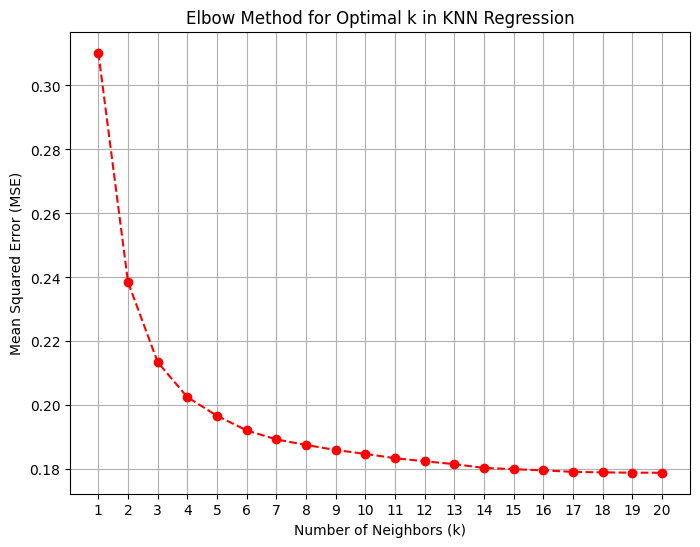

In [6]:
# Range of k values to test
k_values = range(1, 21)

# List to store cross-validated MSE scores
mse_scores = []

# Loop through each k value
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    # Perform 5-fold cross-validation with negative MSE (to minimize)
    neg_mse_scores = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error')
    # Store the mean MSE for the current k
    mse_scores.append(-neg_mse_scores.mean())  # Convert to positive MSE

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(k_values, mse_scores, marker='o', linestyle='--', color='r')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Method for Optimal k in KNN Regression')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [9]:
knn = KNeighborsClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [13],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Uniform or distance-based weighting
    'metric': ['euclidean', 'manhattan'],  # Distance metric
}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting KNN # {fold + 1}.")
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_knn = grid_search.best_estimator_
    y_pred_val = best_knn.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['KNN'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))
print(foldScores['KNN'])

Starting KNN # 1.
Starting KNN # 2.
Starting KNN # 3.
Starting KNN # 4.
Starting KNN # 5.
              precision    recall  f1-score   support

       False       0.46      0.52      0.49       739
        True       0.81      0.78      0.80      2004

    accuracy                           0.71      2743
   macro avg       0.64      0.65      0.64      2743
weighted avg       0.72      0.71      0.71      2743

[[ 383  356]
 [ 445 1559]]
{'F1-deviation': 0.008774024168552986, 'F1-average': 0.7048361157387978, 'Accuracy-average': 0.7009339702757829}


- KNN results

At a glance, KNN presents results comparable to the Decision Tree model, being just slightly worst at predicting the minority class.
Other than this, there isn't much more to add that wasn't already covered by other models.

Using KNN could act as a substitute for DecisionTree however the best use for both KNN, Decision Tree and Naive Bayes would probably be to perform some model ensemble and create a new model with a technique such as Stacking.

With the F1 standard deviation of 0.008 we can safely assume the model is adapting similarly across all data.

### Logistic Regression

In [15]:
log_regression = LogisticRegression(random_state=42)
param_grid = [
    # 'lbfgs' solver supports only 'l2'
    {'solver': ['lbfgs'], 
     'penalty': ['l2'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced']},

    # 'liblinear' solver supports 'l1' and 'l2'
    {'solver': ['liblinear'], 
     'penalty': ['l1', 'l2'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced']},

    # 'saga' solver supports 'l1', 'l2', and 'elasticnet'
    {'solver': ['saga'], 
     'penalty': ['l1', 'l2'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced']},
    
    # 'saga' solver with 'elasticnet'
    {'solver': ['saga'], 
     'penalty': ['elasticnet'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced'], 
     'l1_ratio': [0.5, 0.7, 0.9]}  # Elastic net-specific parameter
]

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Log Regression # {fold + 1}.")
    grid_search = GridSearchCV(estimator=log_regression, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_log_regression = grid_search.best_estimator_
    y_pred_val = best_log_regression.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['LogRegression'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))
print(foldScores['LogRegression'])

Starting Log Regression # 1.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Starting Log Regression # 2.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Starting Log Regression # 3.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Starting Log Regression # 4.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Starting Log Regression # 5.
              precision    recall  f1-score   support

       False       0.50      0.07      0.13       739
        True       0.74      0.97      0.84      2004

    accuracy                           0.73      2743
   macro avg       0.62      0.52      0.48      2743
weighted avg       0.68      0.73      0.65      2743

[[  53  686]
 [  53 1951]]
{'F1-deviation': 0.011533292993269053, 'F1-average': 0.6336095839247203, 'Accuracy-average': 0.7279088886739531}


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


- Logistic Regression Results

Logistic Regression is the simplier model that we are trying. It is also the one with the worst performance by far.

Although an accuracy of 73% is good, the scores for the minority class are very bad.\
The model is essentially nearly always returning the majority class. This gets a fairly good result for that class however its usefullness is only sligthly better then simply assuming there are no pets that don't get adopted.

The only purpose we saw fit for this model was to be a possible indicator for the False class, as when it does predict the class is False, we can toss a coin and claim if it is or isn't in fact, False.

With the F1 standard deviation of 0.01 we can safely assume the model is adapting similarly across all data.

In [14]:
foldScores

{'Bayes': {'F1-deviation': 0.02164475846044547,
  'F1-average': 0.5723353990171749,
  'Accuracy-average': 0.5489202305577197},
 'DTree': {'F1-deviation': 0.012873252777105163,
  'F1-average': 0.6964331099904786,
  'Accuracy-average': 0.6885406425473164},
 'KNN': {'F1-deviation': 0.008774024168552986,
  'F1-average': 0.7048361157387978,
  'Accuracy-average': 0.7009339702757829},
 'RForest': {'F1-deviation': 0.009464845309737862,
  'F1-average': 0.7328138915184084,
  'Accuracy-average': 0.7354920130647957},
 'LogRegression': {'F1-deviation': 0.011533292993269053,
  'F1-average': 0.6336095839247203,
  'Accuracy-average': 0.7279088886739531}}

## Full - MultiClass Classification

Not Using SMOTE BECAUSE CLASSIFICATION ISN'T BINARY

In [16]:
df = pd.read_csv('./Data/DF.csv', index_col='PetID') # Classifications for generic DF with AdoptionSpeed as the target
#smote = SMOTE(sampling_strategy=0.8, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
X, y = df.drop(columns='AdoptionSpeed'), df['AdoptionSpeed']


foldScores = {}

### Decision Tree

In [17]:
dtree = tree.DecisionTreeClassifier(random_state=42)

dtree_param_grid = {
    'max_depth': [3,5,10,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    #X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Decision Tree # {fold + 1}.")
    grid_search = GridSearchCV(estimator=dtree, param_grid=dtree_param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_dtree = grid_search.best_estimator_
    y_pred_val = best_dtree.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['DTree'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))
print(foldScores['DTree'])

Starting Decision Tree # 1.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan n

Starting Decision Tree # 2.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan 

Starting Decision Tree # 3.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan 

Starting Decision Tree # 4.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan n

Starting Decision Tree # 5.
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.24      0.16      0.19       560
           2       0.33      0.59      0.42       748
           3       0.26      0.02      0.04       619
           4       0.45      0.59      0.51       739

    accuracy                           0.36      2743
   macro avg       0.26      0.27      0.23      2743
weighted avg       0.32      0.36      0.30      2743

[[  0  11  42   4  20]
 [  0  89 346   7 118]
 [  0  91 443  13 201]
 [  0  84 327  13 195]
 [  0  96 192  13 438]]
{'F1-deviation': 0.015600790235479004, 'F1-average': 0.29598740017244235, 'Accuracy-average': 0.36308002134242584}


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan n

Applying our data for the non-simplified, binary aproach to AdoptionSpeed, we get a much more complex problem and less interesting results to match.

With the only classes that achieved a f1-score higher then 40% being 2 and 4 and all others getting 04% and even 00%, meaning that the class wasn't predicted as a whole, suggests that it would bennefit from some simplification, as we did by creating the isPetAdopted Class. 

We can't however simply claim that the fact that we created our class was the only reason why this predictions aren't as good as the others, as the predictions using isPetAdopted class as target are also using SMOTE as a oversampling technique, essentially minimizing the impact this issue in our data has on the model performance.

### Random Forest

In [18]:
rforest = RandomForestClassifier(random_state=42)

param_grid = {
    'max_depth': [3,5,10,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    #X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Decision Tree # {fold + 1}.")
    grid_search = GridSearchCV(estimator=rforest, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_rforest = grid_search.best_estimator_
    y_pred_val = best_rforest.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['RForest'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))
print(foldScores['RForest'])

Starting Decision Tree # 1.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan 

Starting Decision Tree # 2.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan 

Starting Decision Tree # 3.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan 

Starting Decision Tree # 4.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan n

Starting Decision Tree # 5.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan n

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.32      0.12      0.18       560
           2       0.32      0.59      0.42       748
           3       0.32      0.04      0.07       619
           4       0.44      0.64      0.52       739

    accuracy                           0.37      2743
   macro avg       0.28      0.28      0.24      2743
weighted avg       0.34      0.37      0.31      2743

[[  0  10  43   3  21]
 [  0  70 347   8 135]
 [  0  69 445  12 222]
 [  0  42 338  24 215]
 [  0  28 209  28 474]]
{'F1-deviation': 0.010331811535774595, 'F1-average': 0.2943165652971477, 'Accuracy-average': 0.3667985776676172}


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Similar results to the decision tree, different numbers, same conclusion.

### Bayes

In [19]:
bayes = GaussianNB()
param_grid = {}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    #X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Bayes # {fold + 1}.")
    grid_search = GridSearchCV(estimator=bayes, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_bayes = grid_search.best_estimator_
    y_pred_val = best_bayes.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['Bayes'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))
print(foldScores['Bayes'])

Starting Bayes # 1.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Starting Bayes # 2.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Starting Bayes # 3.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Starting Bayes # 4.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Starting Bayes # 5.
              precision    recall  f1-score   support

           0       0.02      0.03      0.02        77
           1       0.27      0.44      0.34       560
           2       0.33      0.29      0.31       748
           3       0.34      0.17      0.23       619
           4       0.43      0.46      0.45       739

    accuracy                           0.33      2743
   macro avg       0.28      0.28      0.27      2743
weighted avg       0.34      0.33      0.33      2743

[[  2  39  12   8  16]
 [ 27 249 140  48  96]
 [ 23 246 220  78 181]
 [ 22 195 148 106 148]
 [ 15 181 137  68 338]]
{'F1-deviation': 0.004447406218335813, 'F1-average': 0.3308586363378326, 'Accuracy-average': 0.34077017140901467}


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Using the Naive Bayes algorithm we got to predict 2 entreis of class 0, getting us the view of what recall and f1-score we can expect from this class. 

### KNN

Picking K=13 for the same reason.

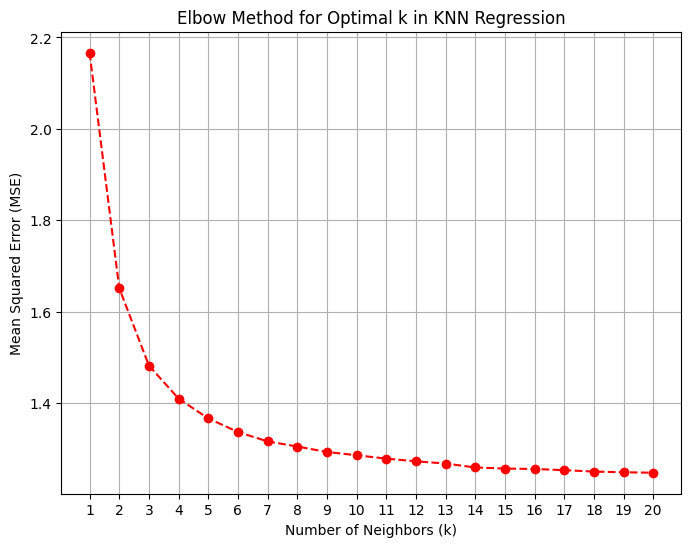

In [20]:
# Range of k values to test
k_values = range(1, 21)

# List to store cross-validated MSE scores
mse_scores = []

# Loop through each k value
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    # Perform 5-fold cross-validation with negative MSE (to minimize)
    neg_mse_scores = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error')
    # Store the mean MSE for the current k
    mse_scores.append(-neg_mse_scores.mean())  # Convert to positive MSE

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(k_values, mse_scores, marker='o', linestyle='--', color='r')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Method for Optimal k in KNN Regression')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [22]:
knn = KNeighborsClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [13],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Uniform or distance-based weighting
    'metric': ['euclidean', 'manhattan'],  # Distance metric
}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    #X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting KNN # {fold + 1}.")
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_knn = grid_search.best_estimator_
    y_pred_val = best_knn.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['KNN'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))
print(foldScores['KNN'])

Starting KNN # 1.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


Starting KNN # 2.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


Starting KNN # 3.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


Starting KNN # 4.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


Starting KNN # 5.
              precision    recall  f1-score   support

           0       0.14      0.03      0.04        77
           1       0.27      0.34      0.30       560
           2       0.32      0.39      0.35       748
           3       0.30      0.20      0.24       619
           4       0.49      0.46      0.47       739

    accuracy                           0.34      2743
   macro avg       0.30      0.28      0.28      2743
weighted avg       0.34      0.34      0.34      2743

[[  2  36  21   3  15]
 [  5 190 210  77  78]
 [  2 210 288 117 131]
 [  3 144 213 125 134]
 [  2 127 173  96 341]]
{'F1-deviation': 0.006349545175961395, 'F1-average': 0.3443524680515251, 'Accuracy-average': 0.34951902483820463}


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


There are very few things to comment on all these models as their performance is about the same.

### Logistic Regression

In [23]:
log_regression = LogisticRegression(random_state=42)
param_grid = [
    # 'lbfgs' solver supports only 'l2'
    {'solver': ['lbfgs'], 
     'penalty': ['l2'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced']},

    # 'liblinear' solver supports 'l1' and 'l2'
    {'solver': ['liblinear'], 
     'penalty': ['l1', 'l2'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced']},

    # 'saga' solver supports 'l1', 'l2', and 'elasticnet'
    {'solver': ['saga'], 
     'penalty': ['l1', 'l2'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced']},
    
    # 'saga' solver with 'elasticnet'
    {'solver': ['saga'], 
     'penalty': ['elasticnet'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced'], 
     'l1_ratio': [0.5, 0.7, 0.9]}  # Elastic net-specific parameter
]

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    #X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Log Regression # {fold + 1}.")
    grid_search = GridSearchCV(estimator=log_regression, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_log_regression = grid_search.best_estimator_
    y_pred_val = best_log_regression.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['LogRegression'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))
print(foldScores['LogRegression'])

Starting Log Regression # 1.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Starting Log Regression # 2.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Starting Log Regression # 3.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Starting Log Regression # 4.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Starting Log Regression # 5.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.32      0.09      0.14       560
           2       0.29      0.40      0.33       748
           3       0.24      0.02      0.04       619
           4       0.33      0.67      0.45       739

    accuracy                           0.31      2743
   macro avg       0.24      0.24      0.19      2743
weighted avg       0.29      0.31      0.25      2743

[[  0   3  43   3  28]
 [  0  52 264   7 237]
 [  0  47 299   6 396]
 [  0  32 246  12 329]
 [  0  28 191  22 498]]
{'F1-deviation': 0.012902845297494626, 'F1-average': 0.254329972858435, 'Accuracy-average': 0.3165655434612781}


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defin

Similar results to tree models.

In [24]:
foldScores

{'DTree': {'F1-deviation': 0.015600790235479004,
  'F1-average': 0.29598740017244235,
  'Accuracy-average': 0.36308002134242584},
 'RForest': {'F1-deviation': 0.010331811535774595,
  'F1-average': 0.2943165652971477,
  'Accuracy-average': 0.3667985776676172},
 'Bayes': {'F1-deviation': 0.006349545175961395,
  'F1-average': 0.3443524680515251,
  'Accuracy-average': 0.34951902483820463},
 'KNN': {'F1-deviation': 0.006349545175961395,
  'F1-average': 0.3443524680515251,
  'Accuracy-average': 0.34951902483820463},
 'LogRegression': {'F1-deviation': 0.012902845297494626,
  'F1-average': 0.254329972858435,
  'Accuracy-average': 0.3165655434612781}}

taking a look at the model performance/split we can see that the deviation on all models was < 0.03, which allows us to claim the performance is similar across all data.

## Cats - Binary Classification

In [25]:
df = pd.read_csv('./Data/BINARY-CATS.csv', index_col='PetID') # Classifications for generic DF with isPetAdopted as the target
smote = SMOTE(sampling_strategy=0.8, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
X, y = df.drop(columns='isPetAdopted'), df['isPetAdopted']


foldScores = {}

### Decision Tree

In [26]:
dtree = tree.DecisionTreeClassifier(random_state=42)

dtree_param_grid = {
    'max_depth': [3,5,10,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Decision Tree # {fold + 1}.")
    grid_search = GridSearchCV(estimator=dtree, param_grid=dtree_param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_dtree = grid_search.best_estimator_
    y_pred_val = best_dtree.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['DTree'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))
print(foldScores['DTree'])

Starting Decision Tree # 1.
Starting Decision Tree # 2.
Starting Decision Tree # 3.
Starting Decision Tree # 4.
Starting Decision Tree # 5.
              precision    recall  f1-score   support

       False       0.38      0.44      0.41       301
        True       0.81      0.78      0.79       947

    accuracy                           0.69      1248
   macro avg       0.60      0.61      0.60      1248
weighted avg       0.71      0.69      0.70      1248

[[131 170]
 [213 734]]
{'F1-deviation': 0.010835592324335579, 'F1-average': 0.694524153723722, 'Accuracy-average': 0.6892628205128205}


- Results Decision Tree - Cats Only

Comparing to the results of Decision Tree on both cats and dogs, the model performance is slightly worse. This immediately suggests the performance should improve checking the Dogs Data.

The model performance isn't as good as we hoped it would be as when it comes to predicting the cats that will not be adopted, it doesn't reach the 50%.

### Random Forest

In [27]:
rforest = RandomForestClassifier(random_state=42)

param_grid = {
    'max_depth': [3,5,10,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Decision Tree # {fold + 1}.")
    grid_search = GridSearchCV(estimator=rforest, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_rforest = grid_search.best_estimator_
    y_pred_val = best_rforest.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['RForest'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))
print(foldScores['RForest'])

Starting Decision Tree # 1.
Starting Decision Tree # 2.
Starting Decision Tree # 3.
Starting Decision Tree # 4.
Starting Decision Tree # 5.
              precision    recall  f1-score   support

       False       0.49      0.46      0.48       301
        True       0.83      0.85      0.84       947

    accuracy                           0.76      1248
   macro avg       0.66      0.66      0.66      1248
weighted avg       0.75      0.76      0.75      1248

[[139 162]
 [143 804]]
{'F1-deviation': 0.013045664328002329, 'F1-average': 0.7299762758640389, 'Accuracy-average': 0.7334935897435898}


- Results Random Forest - Cats Only

Presenting the same issues as the Decision Tree model, we can take the same conclusions in Random Forest. This time, however we would rather take on the more complex model as the increase from 41% to 48% in the f1-score for the minority class is much appreciated and surely adds more vlaue to the model, especially because it was precisely here that the Decision Tree failed the most.

Also the fact that that this metric increased also resulted on a overall better model, with considerably higher values on all metrics.

### Bayes

In [28]:
bayes = GaussianNB()
param_grid = {}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Bayes # {fold + 1}.")
    grid_search = GridSearchCV(estimator=bayes, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_bayes = grid_search.best_estimator_
    y_pred_val = best_bayes.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['Bayes'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))
print(foldScores['Bayes'])

Starting Bayes # 1.
Starting Bayes # 2.
Starting Bayes # 3.
Starting Bayes # 4.
Starting Bayes # 5.
              precision    recall  f1-score   support

       False       0.30      0.64      0.41       301
        True       0.82      0.53      0.65       947

    accuracy                           0.56      1248
   macro avg       0.56      0.59      0.53      1248
weighted avg       0.70      0.56      0.59      1248

[[193 108]
 [443 504]]
{'F1-deviation': 0.03360313681441668, 'F1-average': 0.5827289064830644, 'Accuracy-average': 0.5580128205128205}


- Results Naive Bayes - Cats Only

The results presented by naive bayes came to a good surprise, as the recall of 64% on the minority class is surely something we can use in a subsequent step to try and validade our predictions.

Although this isn't the best model for accuracy or even f1 score, we believe it to be the most usefull model to try and predict cats that aren't going to be adopted.

### KNN

For k in Cats Data we opted to pick k = 7 as the decrease in the MSE starts to be less and less from that point onwards

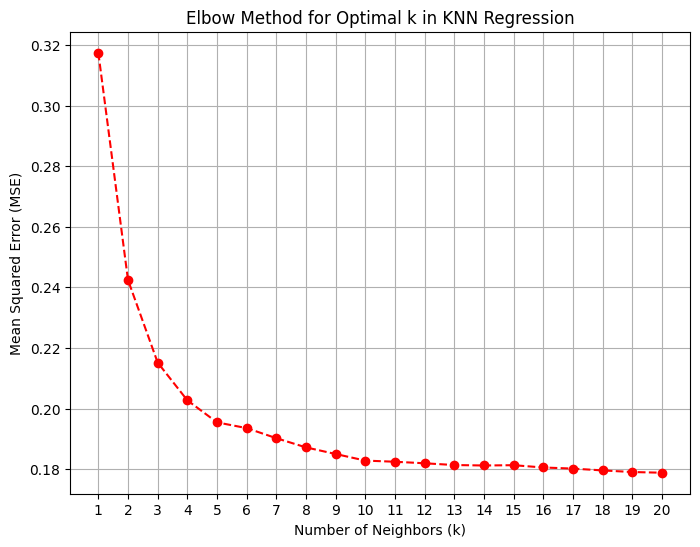

In [7]:
# Range of k values to test
k_values = range(1, 21)

# List to store cross-validated MSE scores
mse_scores = []

# Loop through each k value
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    # Perform 5-fold cross-validation with negative MSE (to minimize)
    neg_mse_scores = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error')
    # Store the mean MSE for the current k
    mse_scores.append(-neg_mse_scores.mean())  # Convert to positive MSE

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(k_values, mse_scores, marker='o', linestyle='--', color='r')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Method for Optimal k in KNN Regression')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [30]:
# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [7],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Uniform or distance-based weighting
    'metric': ['euclidean', 'manhattan'],  # Distance metric
}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    #X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting KNN # {fold + 1}.")
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_knn = grid_search.best_estimator_
    y_pred_val = best_knn.predict(X_val)  # Ensure this gives class labels
    y_pred_val = (y_pred_val > 0.5).astype(int)
    
    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['KNN'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))
print(foldScores['KNN'])

Starting KNN # 1.
Starting KNN # 2.
Starting KNN # 3.
Starting KNN # 4.
Starting KNN # 5.
              precision    recall  f1-score   support

       False       0.43      0.22      0.29       301
        True       0.78      0.91      0.84       947

    accuracy                           0.74      1248
   macro avg       0.61      0.56      0.57      1248
weighted avg       0.70      0.74      0.71      1248

[[ 65 236]
 [ 86 861]]
{'F1-deviation': 0.01023539618979156, 'F1-average': 0.7001434795144684, 'Accuracy-average': 0.7365384615384615}


- Results KNN - Cats Only

On contrast with Naive Bayes, KNN results were sligltly dissapoining because although the accuracy and True class f1 are good, it all goes for nothing when we look at how bad the metrics for the minority class predict. 

The difference between the results in KNN and Naive Bayes suggests once again that it would be interesting to ensemble using Stacking over these multiple models.

### Logistic Regression

In [31]:
log_regression = LogisticRegression(random_state=42)
param_grid = [
    # 'lbfgs' solver supports only 'l2'
    {'solver': ['lbfgs'], 
     'penalty': ['l2'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced']},

    # 'liblinear' solver supports 'l1' and 'l2'
    {'solver': ['liblinear'], 
     'penalty': ['l1', 'l2'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced']},

    # 'saga' solver supports 'l1', 'l2', and 'elasticnet'
    {'solver': ['saga'], 
     'penalty': ['l1', 'l2'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced']},
    
    # 'saga' solver with 'elasticnet'
    {'solver': ['saga'], 
     'penalty': ['elasticnet'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced'], 
     'l1_ratio': [0.5, 0.7, 0.9]}  # Elastic net-specific parameter
]

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Log Regression # {fold + 1}.")
    grid_search = GridSearchCV(estimator=log_regression, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_log_regression = grid_search.best_estimator_
    y_pred_val = best_log_regression.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['LogRegression'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))
print(foldScores['LogRegression'])

Starting Log Regression # 1.
Starting Log Regression # 2.
Starting Log Regression # 3.
Starting Log Regression # 4.
Starting Log Regression # 5.
              precision    recall  f1-score   support

       False       0.38      0.40      0.39       301
        True       0.81      0.79      0.80       947

    accuracy                           0.70      1248
   macro avg       0.59      0.60      0.60      1248
weighted avg       0.70      0.70      0.70      1248

[[121 180]
 [196 751]]
{'F1-deviation': 0.014644743770871046, 'F1-average': 0.678435955614898, 'Accuracy-average': 0.6746794871794872}


- Resutls Logistic Regression - Cats only 

when comparing the results of log regression on cats vs both cats&dogs, the log regression drasticly improves its majority class overfitting, becoming a model with the same problems as the others. Taking in consideration it was the worst of all, the fact that it caugth up with the other is alrady a significant improvement.

In [32]:
foldScores

{'DTree': {'F1-deviation': 0.010835592324335579,
  'F1-average': 0.694524153723722,
  'Accuracy-average': 0.6892628205128205},
 'RForest': {'F1-deviation': 0.013045664328002329,
  'F1-average': 0.7299762758640389,
  'Accuracy-average': 0.7334935897435898},
 'Bayes': {'F1-deviation': 0.03360313681441668,
  'F1-average': 0.5827289064830644,
  'Accuracy-average': 0.5580128205128205},
 'KNN': {'F1-deviation': 0.01023539618979156,
  'F1-average': 0.7001434795144684,
  'Accuracy-average': 0.7365384615384615},
 'LogRegression': {'F1-deviation': 0.014644743770871046,
  'F1-average': 0.678435955614898,
  'Accuracy-average': 0.6746794871794872}}

with the average deviation over all models so low we can claim the data fits equaly across the different folds.

## Dogs - Binary Classification

In [33]:
df = pd.read_csv('./Data/BINARY-DOGS.csv', index_col='PetID') # Classifications for generic DF with isPetAdopted as the target
smote = SMOTE(sampling_strategy=0.8, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
X, y = df.drop(columns='isPetAdopted'), df['isPetAdopted']


foldScores = {}

### Decision Tree

In [34]:
dtree = tree.DecisionTreeClassifier(random_state=42)

dtree_param_grid = {
    'max_depth': [3,5,10,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Decision Tree # {fold + 1}.")
    grid_search = GridSearchCV(estimator=dtree, param_grid=dtree_param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_dtree = grid_search.best_estimator_
    y_pred_val = best_dtree.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['DTree'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))
print(foldScores['DTree'])

Starting Decision Tree # 1.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Starting Decision Tree # 2.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Starting Decision Tree # 3.
Starting Decision Tree # 4.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Starting Decision Tree # 5.
              precision    recall  f1-score   support

       False       0.56      0.50      0.53       438
        True       0.80      0.84      0.82      1057

    accuracy                           0.74      1495
   macro avg       0.68      0.67      0.67      1495
weighted avg       0.73      0.74      0.73      1495

[[217 221]
 [168 889]]
{'F1-deviation': 0.011203405566660085, 'F1-average': 0.7223658927342644, 'Accuracy-average': 0.7212421976999981}


### Random Forest

In [ ]:
rforest = RandomForestClassifier(random_state=42)

param_grid = {
    'max_depth': [3,5,10,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Decision Tree # {fold + 1}.")
    grid_search = GridSearchCV(estimator=rforest, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_rforest = grid_search.best_estimator_
    y_pred_val = best_rforest.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['RForest'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

### Bayes

In [ ]:
bayes = GaussianNB()
param_grid = {}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Bayes # {fold + 1}.")
    grid_search = GridSearchCV(estimator=bayes, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_bayes = grid_search.best_estimator_
    y_pred_val = best_bayes.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['Bayes'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

### KNN

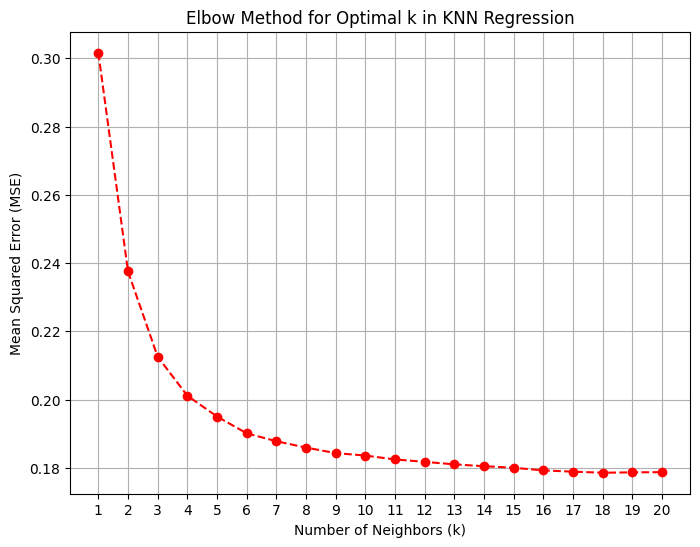

In [4]:
# Range of k values to test
k_values = range(1, 21)

# List to store cross-validated MSE scores
mse_scores = []

# Loop through each k value
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    # Perform 5-fold cross-validation with negative MSE (to minimize)
    neg_mse_scores = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error')
    # Store the mean MSE for the current k
    mse_scores.append(-neg_mse_scores.mean())  # Convert to positive MSE

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(k_values, mse_scores, marker='o', linestyle='--', color='r')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Method for Optimal k in KNN Regression')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [21]:
knn = KNeighborsClassifier()
# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Uniform or distance-based weighting
    'metric': ['euclidean', 'manhattan'],  # Distance metric
}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting KNN # {fold + 1}.")
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_knn = grid_search.best_estimator_
    y_pred_val = best_knn.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['KNN'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

Starting KNN # 1.
Starting KNN # 2.
Starting KNN # 3.
Starting KNN # 4.
Starting KNN # 5.
              precision    recall  f1-score   support

       False       0.43      0.50      0.47       301
        True       0.83      0.79      0.81       947

    accuracy                           0.72      1248
   macro avg       0.63      0.65      0.64      1248
weighted avg       0.74      0.72      0.73      1248

[[152 149]
 [199 748]]


Sliughtly worse results then with all animals.

### Logistic Regression

In [35]:
log_regression = LogisticRegression(random_state=42)
param_grid = [
    # 'lbfgs' solver supports only 'l2'
    {'solver': ['lbfgs'], 
     'penalty': ['l2'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced']},

    # 'liblinear' solver supports 'l1' and 'l2'
    {'solver': ['liblinear'], 
     'penalty': ['l1', 'l2'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced']},

    # 'saga' solver supports 'l1', 'l2', and 'elasticnet'
    {'solver': ['saga'], 
     'penalty': ['l1', 'l2'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced']},
    
    # 'saga' solver with 'elasticnet'
    {'solver': ['saga'], 
     'penalty': ['elasticnet'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced'], 
     'l1_ratio': [0.5, 0.7, 0.9]}  # Elastic net-specific parameter
]

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Log Regression # {fold + 1}.")
    grid_search = GridSearchCV(estimator=log_regression, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_log_regression = grid_search.best_estimator_
    y_pred_val = best_log_regression.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['LogRegression'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))
print(foldScores['LogRegression'])

Starting Log Regression # 1.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Starting Log Regression # 2.
Starting Log Regression # 3.
Starting Log Regression # 4.
Starting Log Regression # 5.
              precision    recall  f1-score   support

       False       0.46      0.47      0.47       438
        True       0.78      0.78      0.78      1057

    accuracy                           0.69      1495
   macro avg       0.62      0.62      0.62      1495
weighted avg       0.69      0.69      0.69      1495

[[205 233]
 [237 820]]


fair results, the consistency on the precision and recall are ok. Even with not so good scores for the minority class log regression isn't showing the worst results ever.

In [36]:
foldScores

{'DTree': {'F1-deviation': 0.011203405566660085,
  'F1-average': 0.7223658927342644,
  'Accuracy-average': 0.7212421976999981},
 'LogRegression': {'F1-deviation': 0.007194568184802757,
  'F1-average': 0.6805826577354176,
  'Accuracy-average': 0.6789710800708242}}